# Senior Thesis 

## Experiment: computing FAR and FRR. (simultaneously)

category: m_04rlf
* for estimate of variance, it's computed as .5*(var(FAR)) + .5*(var(FRR)).


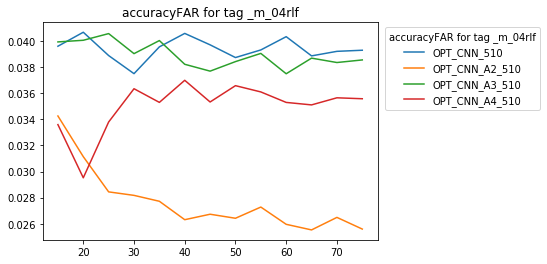

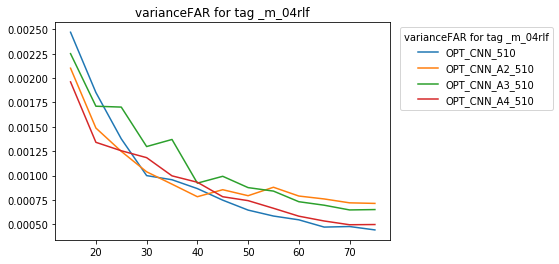

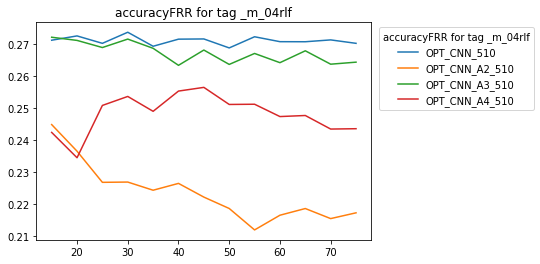

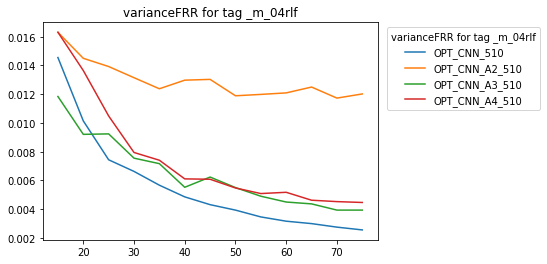

In [37]:
import pickle
import matplotlib.pyplot as plt

allData = pickle.load(open("../code/data/5_strat.dat.pkl"))

nTotals = range(15, 76, 5)
K = [5]
nStep = 10

term = "accuracyFAR"
tag = '_m_04rlf'

for ((nint, nstep, k), accl) in allData["OPT_CNN__m_04rlf"][term]:
    if k in K:
        plt.plot(nTotals, accl, label="OPT_CNN_"+str(k)+str(nstep))

for ((nint, nstep, k), accl) in allData["OPT_CNN_A2"+tag][term]:
    if k in K:
        plt.plot(nTotals, accl, label="OPT_CNN_A2_"+str(k)+str(nstep))

for ((nint, nstep, k), accl) in allData["OPT_CNN_A3"+tag][term]:
    if k in K:
        plt.plot(nTotals, accl, label="OPT_CNN_A3_"+str(k)+str(nstep))

for ((nint, nstep, k), accl) in allData["OPT_CNN_A4"+tag][term]:
    if k in K:
        plt.plot(nTotals, accl, label="OPT_CNN_A4_"+str(k)+str(nstep))

plt.legend(bbox_to_anchor=(1.5, 1), title=term+" for tag "+tag)
plt.title(term+" for tag "+tag)
plt.show()


term = "varianceFAR"

for ((nint, nstep, k), accl) in allData["OPT_CNN__m_04rlf"][term]:
    if k in K:
        plt.plot(nTotals, accl, label="OPT_CNN_"+str(k)+str(nstep))

for ((nint, nstep, k), accl) in allData["OPT_CNN_A2"+tag][term]:
    if k in K:
        plt.plot(nTotals, accl, label="OPT_CNN_A2_"+str(k)+str(nstep))

for ((nint, nstep, k), accl) in allData["OPT_CNN_A3"+tag][term]:
    if k in K:
        plt.plot(nTotals, accl, label="OPT_CNN_A3_"+str(k)+str(nstep))

for ((nint, nstep, k), accl) in allData["OPT_CNN_A4"+tag][term]:
    if k in K:
        plt.plot(nTotals, accl, label="OPT_CNN_A4_"+str(k)+str(nstep))

plt.legend(bbox_to_anchor=(1.5, 1), title=term+" for tag "+tag)
plt.title(term+" for tag "+tag)
plt.show()

term = "accuracyFRR"

for ((nint, nstep, k), accl) in allData["OPT_CNN__m_04rlf"][term]:
    if k in K:
        plt.plot(nTotals, accl, label="OPT_CNN_"+str(k)+str(nstep))

for ((nint, nstep, k), accl) in allData["OPT_CNN_A2"+tag][term]:
    if k in K:
        plt.plot(nTotals, accl, label="OPT_CNN_A2_"+str(k)+str(nstep))

for ((nint, nstep, k), accl) in allData["OPT_CNN_A3"+tag][term]:
    if k in K:
        plt.plot(nTotals, accl, label="OPT_CNN_A3_"+str(k)+str(nstep))

for ((nint, nstep, k), accl) in allData["OPT_CNN_A4"+tag][term]:
    if k in K:
        plt.plot(nTotals, accl, label="OPT_CNN_A4_"+str(k)+str(nstep))

plt.legend(bbox_to_anchor=(1.5, 1), title=term+" for tag "+tag)
plt.title(term+" for tag "+tag)
plt.show()


term = "varianceFRR"

for ((nint, nstep, k), accl) in allData["OPT_CNN__m_04rlf"][term]:
    if k in K:
        plt.plot(nTotals, accl, label="OPT_CNN_"+str(k)+str(nstep))

for ((nint, nstep, k), accl) in allData["OPT_CNN_A2"+tag][term]:
    if k in K:
        plt.plot(nTotals, accl, label="OPT_CNN_A2_"+str(k)+str(nstep))

for ((nint, nstep, k), accl) in allData["OPT_CNN_A3"+tag][term]:
    if k in K:
        plt.plot(nTotals, accl, label="OPT_CNN_A3_"+str(k)+str(nstep))

for ((nint, nstep, k), accl) in allData["OPT_CNN_A4"+tag][term]:
    if k in K:
        plt.plot(nTotals, accl, label="OPT_CNN_A4_"+str(k)+str(nstep))

plt.legend(bbox_to_anchor=(1.5, 1), title=term+" for tag "+tag)
plt.title(term+" for tag "+tag)
plt.show()

## Experiment: computation of DET curve

* estimate of variance is computed as average of all variances (for each trafeoff)

## N = 30, interval (-2, 2, 0.1), category: _m_09x0r

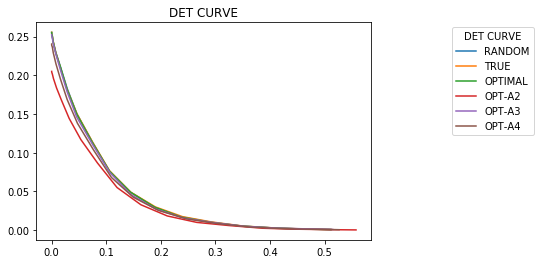

In [36]:
import pickle
import matplotlib.pyplot as plt

collectedStrat = pickle.load(open("n30_strat.dat.pkl"))
tradeoffs = collectedStrat["tradeoffs"]
(randFAR, randFRR, varRandFAR, varRandFRR) = collectedStrat["random"]
(trueFAR, trueFRR, varXFAR, varXFRR) = collectedStrat["true"]
(OPTFAR, OPTFRR, varOPTFAR, varOPTFRR) = collectedStrat["OPT_CNN"] 
(A2FAR, A2FRR, varA2FAR, varA2FRR) = collectedStrat["OPT_CNN_A2"] 
(A3FAR, A3FRR, varA3FAR, varA3FRR) = collectedStrat["OPT_CNN_A3"] 
(A4FAR, A4FRR, varA4FAR, varA4FRR) = collectedStrat["OPT_CNN_A4"]  

f1 = plt.figure("DET CURVE")
plt.plot(randFAR,randFRR, label = "RANDOM")
#f2 = plt.figure("RBF" + speaker)
plt.plot(trueFAR,trueFRR, label = "TRUE")
plt.plot(OPTFAR,OPTFRR, label = "OPTIMAL")
plt.plot(A2FAR,A2FRR, label = "OPT-A2")
plt.plot(A3FAR,A3FRR, label = "OPT-A3")
plt.plot(A4FAR,A4FRR, label = "OPT-A4")
plt.legend(bbox_to_anchor=(1.5, 1), title="DET CURVE")
plt.title("DET CURVE")
plt.show()

## N = 30, variance

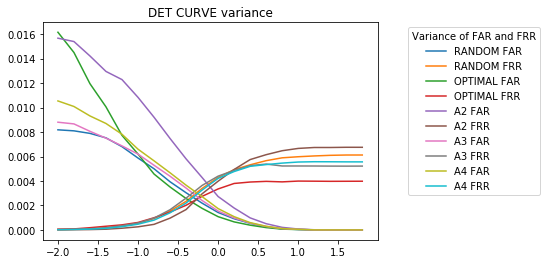

In [35]:
import pickle
import matplotlib.pyplot as plt

collectedStrat = pickle.load(open("n30_strat.dat.pkl"))
tradeoffs = collectedStrat["tradeoffs"]
(randFAR, randFRR, varRandFAR, varRandFRR) = collectedStrat["random"]
(trueFAR, trueFRR, varXFAR, varXFRR) = collectedStrat["true"]
(OPTFAR, OPTFRR, varOPTFAR, varOPTFRR) = collectedStrat["OPT_CNN"] 
(A2FAR, A2FRR, varA2FAR, varA2FRR) = collectedStrat["OPT_CNN_A2"] 
(A3FAR, A3FRR, varA3FAR, varA3FRR) = collectedStrat["OPT_CNN_A3"] 
(A4FAR, A4FRR, varA4FAR, varA4FRR) = collectedStrat["OPT_CNN_A4"] 

f1 = plt.figure("DET CURVE")
plt.plot(tradeoffs,varRandFAR, label = "RANDOM FAR")
plt.plot(tradeoffs,varRandFRR, label = "RANDOM FRR")

plt.plot(tradeoffs,varOPTFAR, label = "OPTIMAL FAR")
plt.plot(tradeoffs,varOPTFRR, label = "OPTIMAL FRR")

plt.plot(tradeoffs,varA2FAR, label = "A2 FAR")
plt.plot(tradeoffs,varA2FRR, label = "A2 FRR")

plt.plot(tradeoffs,varA3FAR, label = "A3 FAR")
plt.plot(tradeoffs,varA3FRR, label = "A3 FRR")

plt.plot(tradeoffs,varA4FAR, label = "A4 FAR")
plt.plot(tradeoffs,varA4FRR, label = "A4 FRR")


plt.legend(bbox_to_anchor=(1.5, 1), title="Variance of FAR and FRR")
plt.title("DET CURVE variance")
plt.show()

# N = 40

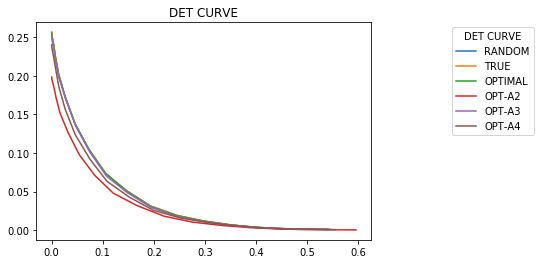

In [28]:
import pickle
import matplotlib.pyplot as plt

collectedStrat = pickle.load(open("n40_strat.dat.pkl"))
tradeoffs = collectedStrat["tradeoffs"]
(randFAR, randFRR, varRandFAR, varRandFRR) = collectedStrat["random"]
(trueFAR, trueFRR, varXFAR, varXFRR) = collectedStrat["true"]
(OPTFAR, OPTFRR, varOPTFAR, varOPTFRR) = collectedStrat["OPT_CNN"] 
(A2FAR, A2FRR, varA2FAR, varA2FRR) = collectedStrat["OPT_CNN_A2"] 
(A3FAR, A3FRR, varA3FAR, varA3FRR) = collectedStrat["OPT_CNN_A3"] 
(A4FAR, A4FRR, varA4FAR, varA4FRR) = collectedStrat["OPT_CNN_A4"]  

f1 = plt.figure("DET CURVE")
plt.plot(randFAR,randFRR, label = "RANDOM")
#f2 = plt.figure("RBF" + speaker)
plt.plot(trueFAR,trueFRR, label = "TRUE")
plt.plot(OPTFAR,OPTFRR, label = "OPTIMAL")
plt.plot(A2FAR,A2FRR, label = "OPT-A2")
plt.plot(A3FAR,A3FRR, label = "OPT-A3")
plt.plot(A4FAR,A4FRR, label = "OPT-A4")
plt.legend(bbox_to_anchor=(1.5, 1), title="DET CURVE")
plt.title("DET CURVE")
plt.show()

## N =40, variance

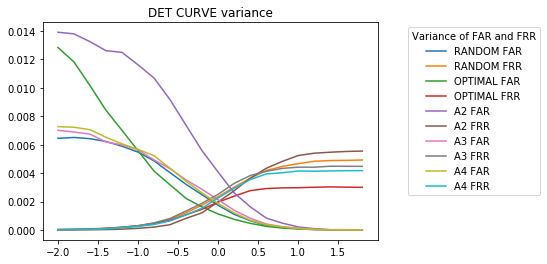

In [29]:
import pickle
import matplotlib.pyplot as plt

collectedStrat = pickle.load(open("n40_strat.dat.pkl"))
tradeoffs = collectedStrat["tradeoffs"]
(randFAR, randFRR, varRandFAR, varRandFRR) = collectedStrat["random"]
(trueFAR, trueFRR, varXFAR, varXFRR) = collectedStrat["true"]
(OPTFAR, OPTFRR, varOPTFAR, varOPTFRR) = collectedStrat["OPT_CNN"] 
(A2FAR, A2FRR, varA2FAR, varA2FRR) = collectedStrat["OPT_CNN_A2"] 
(A3FAR, A3FRR, varA3FAR, varA3FRR) = collectedStrat["OPT_CNN_A3"] 
(A4FAR, A4FRR, varA4FAR, varA4FRR) = collectedStrat["OPT_CNN_A4"] 

f1 = plt.figure("DET CURVE")
plt.plot(tradeoffs,varRandFAR, label = "RANDOM FAR")
plt.plot(tradeoffs,varRandFRR, label = "RANDOM FRR")

plt.plot(tradeoffs,varOPTFAR, label = "OPTIMAL FAR")
plt.plot(tradeoffs,varOPTFRR, label = "OPTIMAL FRR")

plt.plot(tradeoffs,varA2FAR, label = "A2 FAR")
plt.plot(tradeoffs,varA2FRR, label = "A2 FRR")

plt.plot(tradeoffs,varA3FAR, label = "A3 FAR")
plt.plot(tradeoffs,varA3FRR, label = "A3 FRR")

plt.plot(tradeoffs,varA4FAR, label = "A4 FAR")
plt.plot(tradeoffs,varA4FRR, label = "A4 FRR")


plt.legend(bbox_to_anchor=(1.5, 1), title="Variance of FAR and FRR")
plt.title("DET CURVE variance")
plt.show()

## N = 50, DET CURVE

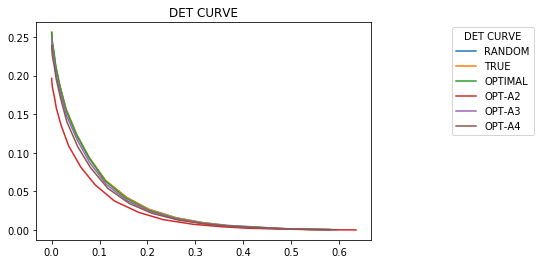

In [14]:
import pickle
import matplotlib.pyplot as plt

collectedStrat = pickle.load(open("n50_strat.dat.pkl"))
tradeoffs = collectedStrat["tradeoffs"]
(randFAR, randFRR, varRandFAR, varRandFRR) = collectedStrat["random"]
(trueFAR, trueFRR, varRandFAR, varRandFRR) = collectedStrat["true"]
(OPTFAR, OPTFRR, varOPTFAR, varOPTFRR) = collectedStrat["OPT_CNN"] 
(A2FAR, A2FRR, varA2FAR, varA2FRR) = collectedStrat["OPT_CNN_A2"] 
(A3FAR, A3FRR, varA3FAR, varA3FRR) = collectedStrat["OPT_CNN_A3"] 
(A4FAR, A4FRR, varA4FAR, varA4FRR) = collectedStrat["OPT_CNN_A4"]  

f1 = plt.figure("DET CURVE")
plt.plot(randFAR,randFRR, label = "RANDOM")
#f2 = plt.figure("RBF" + speaker)
plt.plot(trueFAR,trueFRR, label = "TRUE")
plt.plot(OPTFAR,OPTFRR, label = "OPTIMAL")
plt.plot(A2FAR,A2FRR, label = "OPT-A2")
plt.plot(A3FAR,A3FRR, label = "OPT-A3")
plt.plot(A4FAR,A4FRR, label = "OPT-A4")
plt.legend(bbox_to_anchor=(1.5, 1), title="DET CURVE")
plt.title("DET CURVE")
plt.show()

## N = 50, variance

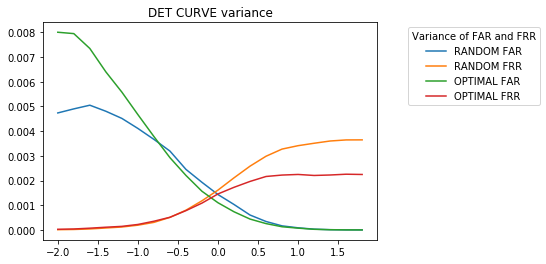

In [24]:
import pickle
import matplotlib.pyplot as plt

collectedStrat = pickle.load(open("n50_strat.dat.pkl"))
tradeoffs = collectedStrat["tradeoffs"]
(randFAR, randFRR, varRandFAR, varRandFRR) = collectedStrat["random"]
(trueFAR, trueFRR, varXFAR, varXFRR) = collectedStrat["true"]
(OPTFAR, OPTFRR, varOPTFAR, varOPTFRR) = collectedStrat["OPT_CNN"] 
(A2FAR, A2FRR, varA2FAR, varA2FRR) = collectedStrat["OPT_CNN_A2"] 
(A3FAR, A3FRR, varA3FAR, varA3FRR) = collectedStrat["OPT_CNN_A3"] 
(A4FAR, A4FRR, varA4FAR, varA4FRR) = collectedStrat["OPT_CNN_A4"] 

f1 = plt.figure("DET CURVE")
plt.plot(tradeoffs,varRandFAR, label = "RANDOM FAR")
plt.plot(tradeoffs,varRandFRR, label = "RANDOM FRR")

plt.plot(tradeoffs,varOPTFAR, label = "OPTIMAL FAR")
plt.plot(tradeoffs,varOPTFRR, label = "OPTIMAL FRR")

plt.plot(tradeoffs,varA2FAR, label = "A2 FAR")
plt.plot(tradeoffs,varA2FRR, label = "A2 FRR")

plt.plot(tradeoffs,varA3FAR, label = "A3 FAR")
plt.plot(tradeoffs,varA3FRR, label = "A3 FRR")

plt.plot(tradeoffs,varA4FAR, label = "A4 FAR")
plt.plot(tradeoffs,varA4FRR, label = "A4 FRR")


plt.legend(bbox_to_anchor=(1.5, 1), title="Variance of FAR and FRR")
plt.title("DET CURVE variance")
plt.show()

## Experiment details:


* **Classifier accuracy:** 62.1%
* **Data:** features extracted from CNN. 20000 training instances, 10000 testing instances
* **5000** positive training instances, **15000** negative instances.
* **category:** _m_09x0r

**Random sampling estimated. hard to compare because actual number of samples in the experiments vary depending on rounding**

## Accuracy


[((10, 10, 5), [0.62138800139103256, 0.62276390839163953, 0.6237334819642143])]
[((10, 10, 5), [0.62460746160668734, 0.62370418735126243, 0.62204392600732983])]
[((10, 10, 5), [0.62117468368299711, 0.62017068789731455, 0.62208166939630782])]
[((10, 10, 5), [0.6216202896748666, 0.62519024880182117, 0.6232714442856141])]
[((10, 10, 5), [0.62362538530275036, 0.62401708570160541, 0.62226920002186137])]


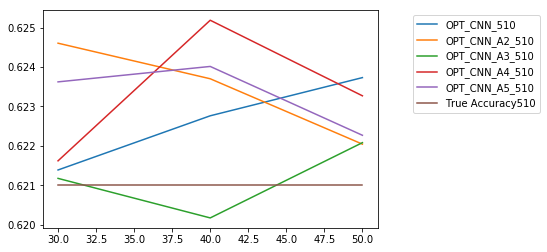

In [28]:
import pickle
import matplotlib.pyplot as plt

term = "accuracy"

allData = pickle.load(open("hey_strat.dat.pkl", "r"))
#randomS_data = pickle.load(open("../code/RANDOM_W.data", "r"))

nTotals = [30, 40, 50]
K = [5]
nStep = 10

print allData["OPT_CNN__m_09x0r"][term]
for ((nint, nstep, k), accl) in allData["OPT_CNN__m_09x0r"][term]:
    if k in K:
        plt.plot(nTotals, accl, label="OPT_CNN_"+str(k)+str(nstep))

print allData["OPT_CNN_A2_m_09x0r"][term]
for ((nint, nstep, k), accl) in allData["OPT_CNN_A2_m_09x0r"][term]:
    if k in K:
        plt.plot(nTotals, accl, label="OPT_CNN_A2_"+str(k)+str(nstep))

print allData["OPT_CNN_A3_m_09x0r"][term]
for ((nint, nstep, k), accl) in allData["OPT_CNN_A3_m_09x0r"][term]:
    if k in K:
        plt.plot(nTotals, accl, label="OPT_CNN_A3_"+str(k)+str(nstep))

print allData["OPT_CNN_A4_m_09x0r"][term]
for ((nint, nstep, k), accl) in allData["OPT_CNN_A4_m_09x0r"][term]:
    if k in K:
        plt.plot(nTotals, accl, label="OPT_CNN_A4_"+str(k)+str(nstep))
        
print allData["OPT_CNN_A5_m_09x0r"][term]
for ((nint, nstep, k), accl) in allData["OPT_CNN_A5_m_09x0r"][term]:
    if k in K:
        plt.plot(nTotals, accl, label="OPT_CNN_A5_"+str(k)+str(nstep))
        
#plt.plot(nTotals, randomS_data[term], label="random")
true_acc = [0.621, 0.621, 0.621]


plt.plot(nTotals, true_acc, label="True Accuracy"+str(k)+str(nstep))

plt.legend(bbox_to_anchor=(1.5, 1))

plt.show()




## Variance

[((10, 10, 5), [0.0037660399417461746, 0.0026663699329691477, 0.0021340397631425139])]
[((10, 10, 5), [0.0068499271240130824, 0.0061085901353158563, 0.0061919362087375649])]
[((10, 10, 5), [0.0046699500068252955, 0.0036741459050934674, 0.0029734779358523227])]
[((10, 10, 5), [0.0046258314741156976, 0.0033075215569173572, 0.0029700564813653118])]
[((10, 10, 5), [0.004540912813507882, 0.0037040201219820487, 0.0028709432372902733])]


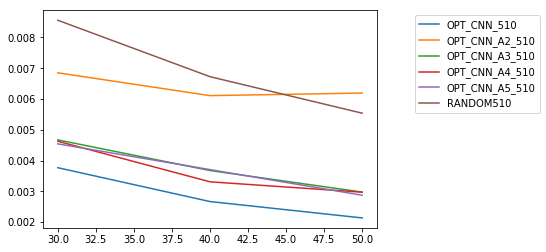

In [29]:
import pickle
import matplotlib.pyplot as plt

term = "variance"

allData = pickle.load(open("hey_strat.dat.pkl", "r"))
#randomS_data = pickle.load(open("../code/RANDOM_W.data", "r"))

nTotals = [30, 40, 50]
randVar = [0.235359, 0.235359, 0.235359]
for x in range (len (nTotals)):
    randVar[x] = randVar[x]/(nTotals[x]-(x+1)*2.5)
    
K = [5]
nStep = 10

print allData["OPT_CNN__m_09x0r"][term]
for ((nint, nstep, k), accl) in allData["OPT_CNN__m_09x0r"][term]:
    if k in K:
        plt.plot(nTotals, accl, label="OPT_CNN_"+str(k)+str(nstep))

print allData["OPT_CNN_A2_m_09x0r"][term]
for ((nint, nstep, k), accl) in allData["OPT_CNN_A2_m_09x0r"][term]:
    if k in K:
        plt.plot(nTotals, accl, label="OPT_CNN_A2_"+str(k)+str(nstep))

print allData["OPT_CNN_A3_m_09x0r"][term]
for ((nint, nstep, k), accl) in allData["OPT_CNN_A3_m_09x0r"][term]:
    if k in K:
        plt.plot(nTotals, accl, label="OPT_CNN_A3_"+str(k)+str(nstep))

print allData["OPT_CNN_A4_m_09x0r"][term]
for ((nint, nstep, k), accl) in allData["OPT_CNN_A4_m_09x0r"][term]:
    if k in K:
        plt.plot(nTotals, accl, label="OPT_CNN_A4_"+str(k)+str(nstep))
        
print allData["OPT_CNN_A5_m_09x0r"][term]
for ((nint, nstep, k), accl) in allData["OPT_CNN_A5_m_09x0r"][term]:
    if k in K:
        plt.plot(nTotals, accl, label="OPT_CNN_A5_"+str(k)+str(nstep))
        
#plt.plot(nTotals, randomS_data[term], label="random")
plt.plot(nTotals, randVar, label="RANDOM"+str(k)+str(nstep))

plt.legend(bbox_to_anchor=(1.5, 1))

plt.show()




## Analysis of results:

* **Bias:** There is some bias in most of the experiments. results from initial estimation. If a stratum's accuracy estimate initially is higher than true accuracy, it doesn't get "corrected" in the following iterations.

* **Variance: ** There is significant drop in variance. 


## Experiment details:


* **Classifier accuracy:** 74.0%
* **Data:** features extracted from CNN. 20000 training instances, 10000 testing instances
* **8000** positive training instances, **12000** negative instances.
* **category:** _m_04rlf

**Random sampling estimated. hard to compare because actual number of samples in the experiments vary depending on rounding**

## Accuracy

[((10, 10, 5), [0.73971539701594924, 0.74240560732229399, 0.73986688736100492])]
[((10, 10, 5), [0.79502494948639901, 0.8001387387975174, 0.80539580694768265])]
[((10, 10, 5), [0.74330915799653197, 0.74609017525347354, 0.75016480158547261])]
[((10, 10, 5), [0.75687753798100432, 0.75921311960027416, 0.76699582848503456])]
[((10, 10, 5), [0.75845161721975951, 0.75695543291717515, 0.76558150382804502])]


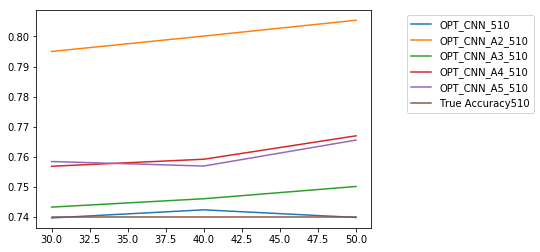

In [30]:
import pickle
import matplotlib.pyplot as plt

term = "accuracy"

allData = pickle.load(open("hey_strat.dat.pkl", "r"))
#randomS_data = pickle.load(open("../code/RANDOM_W.data", "r"))

nTotals = [30, 40, 50]
K = [5]
nStep = 10

print allData["OPT_CNN__m_04rlf"][term]
for ((nint, nstep, k), accl) in allData["OPT_CNN__m_04rlf"][term]:
    if k in K:
        plt.plot(nTotals, accl, label="OPT_CNN_"+str(k)+str(nstep))

print allData["OPT_CNN_A2_m_04rlf"][term]
for ((nint, nstep, k), accl) in allData["OPT_CNN_A2_m_04rlf"][term]:
    if k in K:
        plt.plot(nTotals, accl, label="OPT_CNN_A2_"+str(k)+str(nstep))

print allData["OPT_CNN_A3_m_04rlf"][term]
for ((nint, nstep, k), accl) in allData["OPT_CNN_A3_m_04rlf"][term]:
    if k in K:
        plt.plot(nTotals, accl, label="OPT_CNN_A3_"+str(k)+str(nstep))

print allData["OPT_CNN_A4_m_04rlf"][term]
for ((nint, nstep, k), accl) in allData["OPT_CNN_A4_m_04rlf"][term]:
    if k in K:
        plt.plot(nTotals, accl, label="OPT_CNN_A4_"+str(k)+str(nstep))
        
print allData["OPT_CNN_A5_m_04rlf"][term]
for ((nint, nstep, k), accl) in allData["OPT_CNN_A5_m_04rlf"][term]:
    if k in K:
        plt.plot(nTotals, accl, label="OPT_CNN_A5_"+str(k)+str(nstep))
        
#plt.plot(nTotals, randomS_data[term], label="random")
true_acc = [0.740, 0.740, 0.740]


plt.plot(nTotals, true_acc, label="True Accuracy"+str(k)+str(nstep))

plt.legend(bbox_to_anchor=(1.5, 1))

plt.show()




## Variance

[((10, 10, 5), [0.0068575536378836883, 0.0046575628000885445, 0.0038237077321573551])]
[((10, 10, 5), [0.013418594964355678, 0.013074668725509239, 0.011977938137355428])]
[((10, 10, 5), [0.0073568563838573879, 0.005322533111432352, 0.0054954782085753938])]
[((10, 10, 5), [0.0082616144594453936, 0.0063608434402066009, 0.00563525985800038])]
[((10, 10, 5), [0.0082833679917373171, 0.0063137711267110593, 0.0059185659545167536])]


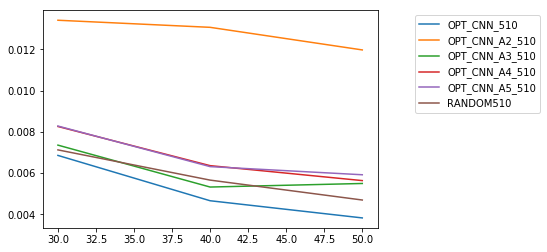

In [31]:
import pickle
import matplotlib.pyplot as plt

term = "variance"

allData = pickle.load(open("hey_strat.dat.pkl", "r"))
#randomS_data = pickle.load(open("../code/RANDOM_W.data", "r"))

nTotals = [30, 40, 50]
K = [5]
nStep = 10

print allData["OPT_CNN__m_04rlf"][term]
for ((nint, nstep, k), accl) in allData["OPT_CNN__m_04rlf"][term]:
    if k in K:
        plt.plot(nTotals, accl, label="OPT_CNN_"+str(k)+str(nstep))

print allData["OPT_CNN_A2_m_04rlf"][term]
for ((nint, nstep, k), accl) in allData["OPT_CNN_A2_m_04rlf"][term]:
    if k in K:
        plt.plot(nTotals, accl, label="OPT_CNN_A2_"+str(k)+str(nstep))

print allData["OPT_CNN_A3_m_04rlf"][term]
for ((nint, nstep, k), accl) in allData["OPT_CNN_A3_m_04rlf"][term]:
    if k in K:
        plt.plot(nTotals, accl, label="OPT_CNN_A3_"+str(k)+str(nstep))

print allData["OPT_CNN_A4_m_04rlf"][term]
for ((nint, nstep, k), accl) in allData["OPT_CNN_A4_m_04rlf"][term]:
    if k in K:
        plt.plot(nTotals, accl, label="OPT_CNN_A4_"+str(k)+str(nstep))
        
print allData["OPT_CNN_A5_m_04rlf"][term]
for ((nint, nstep, k), accl) in allData["OPT_CNN_A5_m_04rlf"][term]:
    if k in K:
        plt.plot(nTotals, accl, label="OPT_CNN_A5_"+str(k)+str(nstep))
        
#plt.plot(nTotals, randomS_data[term], label="random")
randVar = [0.1924, 0.1924, 0.1924]
for x in range (len (nTotals)):
    randVar[x] = randVar[x]/(nTotals[x]-(x+1)*3)
    
plt.plot(nTotals, randVar, label="RANDOM"+str(k)+str(nstep))
    
    
plt.legend(bbox_to_anchor=(1.5, 1))

plt.show()




## Analysis of results:

*compared to previous experiment, there is a lot more samples lot due to rounding error*

* **Bias:** There is **HEAVY** bias in most of the experiments. results from initial estimation. If a stratum's accuracy estimate initially is higher than true accuracy, it doesn't get "corrected" in the following iterations.

* **Variance: ** There isn't drop in variance. This might be because the intial estimates are more "wrong". and more samples are lost.

### Overall observation:

* When accuracy is higher, there is significantly more bias in the experiments. This is because, initial picks might result in higher accuracy estimate than true accuracy. For example, if accuracy is 75%, its more likely to pick 2 initial instances that result in accurate rather than 1 accurate, 1 wrong, throwing off the estimate by a lot.

* there can be considerable loss of samples because of rounding.

## Experiment Active learning vs Passive learning

### Experiment details:

* 5000 audio feautres extracted from CNN.
* 2000 testing instances
* N training instances


## binary svms
![title](untitled.jpg)

## multiple classes
![title](aVpAud.jpg)

## Analysis:

* No significant difference
* It was very very slow

## Experiment: Multiple classes active testing


![title](multAud.png)

## Analysis:

* No significant difference

## October 29 report

### Experiment 5: Margin-based active learning framework with weak labels

**Data:**

Supervectors constructed from recordings of 10 different speakers. There are 960 supervectors available from 960 recordings (96 from each speaker)

**Experiment:** 

A passive learner, a normal active learner and an active learner with weak labels are trained from the supervectors. The training is done in **oneVall** setting for speaker verification task. The learners are trained on particular speaker as class 1, and every other speaker as class 0, resulting in binary classification.

***Passive learner:***
1. Sampled **N** number of supervectors for passive learner as training data. Trained a linear SVM in the setting described earlier.
2. Tested with 40 recordings of class 1 speaker, 360 recordings of other speakers.

***Active learner:***

1. Sampled **INIT** number of supervectors for active learner as initial training data. Trained a linear SVM in the setting described earlier.
2. **OTHERS = N-INIT** number of supervectors are sampled one after another. After each sample, the model is modified. The samples are selected based on margin based approach discussed earlier.
3. generated weak labels by the following formula:
    * p = random.uniform(0.75, 0.90) if sample is positive
    * p = random.uniform(0.1, 0.25) if sample is negative
    
4. NINT are seleceted according to weak labels. Used kmeans with K = 5 to stratify the weak labels. Used equal allocation.    

5. Tested with 40 recordings of class 1 speaker, 360 recordings of other speakers.


**Results:**

1. **FRR** represents false rejection rate. **FAR** represents false acceptance rate
2. Active learner performed better with same number of total samples
3. As **N** increases, active learner and passive learner behave more similarly.
4. Active learner with "weak labels" generally perform better



![title](weak.jpg)

## Experiment 4::

** Let the active learning SVM be S **
1. Keep an SVM, M, trained with weak labels. 
2. When true labels are obtained, update M with the weak labels
3. When selecting samples, consult both S and M





### also classifier trained with weak labels + true labels 




![title](weak2.jpg)




### Experiment 3: Margin-based active learning framework with weak labels

**Data:**

Supervectors constructed from recordings of 10 different speakers. There are 960 supervectors available from 960 recordings (96 from each speaker)

**Experiment:** 

A passive learner, and an active learner with maxmin method are trained from the supervectors. The training is done in **oneVall** setting for speaker verification task. The learners are trained on particular speaker as class 1, and every other speaker as class 0, resulting in binary classification.

***Passive learner:***
1. Sampled **N** number of supervectors for passive learner as training data. Trained a linear SVM in the setting described earlier.
2. Tested with 40 recordings of class 1 speaker, 360 recordings of other speakers.

***Active learner:***

1. Sampled **INIT** number of supervectors for active learner as initial training data. Trained a linear SVM in the setting described earlier.
2. **OTHERS = N-INIT** number of supervectors are sampled one after another. After each sample, the model is modified. The samples are selected based on margin based approach discussed earlier.

3. for each sample, train SVMs with label 0 and label 1. m+, m- denote the distances respectively of this sample. 
4. Sample the instance with max(min(m+,m-))
    
5. Tested with 40 recordings of class 1 speaker, 360 recordings of other speakers.


**Results:**

1. **FRR** represents false rejection rate. **FAR** represents false acceptance rate
2. Active learner performed better with same number of total samples
3. As **N** increases, active learner and passive learner behave more similarly.

![title](maxmin.jpg)






## Neural network trying out

Used Keras.

optimizer: RMSProp, no learning rate mentioned

epochs = 20

batch size = 128

Accuracy 98.19%

***************************************
optimizer: RMSProp, no learning rate mentioned

epochs = 20

batch size = 2000

dropout = 0.1 after each activation layer

batch normalization after each hidden layer

Accuracy 94.67%

********************************************
optimizer: RMSProp, learning rate = 0.001

epochs = 20

batch size = 2000

dropout = 0.1 after each activation layer

batch normalization after each hidden layer

Accuracy 94.68%

********************************************
optimizer: RMSProp, learning rate = 0.01

epochs = 20

batch size = 2000

dropout = 0.1 after each activation layer

batch normalization after each hidden layer

Accuracy 97.68%

********************************************
optimizer: RMSProp, learning rate = 0.01

epochs = 20

batch size = 2000

dropout = 0.01 after each activation layer

batch normalization after each hidden layer

Accuracy 95.26%

********************************************
optimizer: RMSProp, learning rate = 0.01

epochs = 20

batch size = 2000

dropout = 0.25 after each activation layer

batch normalization after each hidden layer

Accuracy 97.85%



## Active Learning -> S. Tong. Active learning: Theory and applications, phd thesis

p.19 -> why is it a convex problem?
        norm of phi(x) fixed?
        
        
p.39 -> what is parameter space W?       
p/42 -> reduce version space size
p.46 -> isn't maxmin extremely expensive?

## Neural networks

** Lecture 4 **

Backpropagation

** Lecture 5 **

1. backprogation doesn't find optimal solution
2. perceptron may swing dramatically on new small input
3. backprop doesn't change dramatically on new small input
4. slide 33: overdesign?
5. slide 34: saddle point. backprop will not slide on saddle point and reach local minimum? 
6. slide 41: only until gradient is 0? It may diverge?
7. Slide 42: why exponentially fast?
8. slide 44: why is quadratic optimization important
9. slide 45: how does convergence, divergence and oscillating convergence work in terms of optimal step size?
10. slide 48: equal value contour parallel to the axis?
11. slide 51: uncoupled descents
12. slide 54: which one is what?
13. slide 59: scale the axis
14. slide 74: whats happening here
15. slide 88: decaying learning rate. assume hessian normalization? escapes local minima
16. slide 89: what is alpha*eta*
17. slide 92: Many of the convergence issues arise because we force the same learning rate on all parameters
18. slide 108: quickprop?
** WHAT IS THE independent PARAMETERs **
* slide 115: momentum based method
* slide 126: nestorov's accelerated gradient


** Lecture 6 **
* Stochastic gradient descent




# October 14 report

## Senior thesis presentation

**Slides:**
https://docs.google.com/presentation/d/1HyOsfYlXgrVh_gg-VyO0K1NHu7guCHN4-YfDTADX1J0/edit?usp=sharing

**Anticipated questions:**

1. How's active testing different from active learning?
2. Active learning/testing done one by one or by batch?
3. Computational time increased a lot?
4. Retrain the whole model or modify the model?
5. How's is it distinct?

## Active Learning

### Experiment 2: Active learning frameworks on multi-class classifiers

**Data:**

Supervectors constructed from recordings of 10 different speakers. There are 960 supervectors available from 960 recordings (96 from each speaker)

**Experiment:** 

A passive learner and an active learner are trained from the supervectors. Tested different active learning frameworks against passive learning

***Passive learner:***
1. Sampled **N** number of supervectors for passive learner as training data. Trained a linear SVM in the setting described earlier.
2. Tested with 40 recordings of class 1 speaker, 360 recordings of other speakers.

***Active learner:***

1. Sampled **INIT** number of supervectors for active learner as initial training data. Trained a linear SVM in the setting described earlier.
2. **NOTHERS = N-INIT** number of supervectors are sampled one after another. After each sample, the model is modified.
3. Frameworks tested based on different measures of uncertainty:
   * Entropy based
   * Least confidence based
   * Margin based
4. Tested with 40 recordings of class 1 speaker, 360 recordings of other speakers.

**Results:**

1. Y axis represents accuracy score
2. Active learner in general performed better with same number of total samples
3. As **N** increases, active learner and passive learner behave more similarly.
4. If **N** drops too much, they start behaving similarly again.



![title](actVspasMult.jpg)

*Couldn't conduct GMM based classification. My implementation took too long to run for active learning. Retraining GMMs after each sample seems computationally expensive. Batch based active learning?*

### Formulation of active learning within SVMs

$$ f:X \rightarrow Z \text { is the mapping by the model}$$
$$ L:Z \times X \times Y \rightarrow \mathbb{R^+} \text{ is the loss function}$$

Goal is to minimize risk of f:

$$ R(f) = \mathbb{E_{(x,y)\leadsto{D}}} \lbrack L(f(x),x,y) \rbrack $$ 


Soft margin SVM:

$$ \underset{w,b}{min} \frac{1}{2} \| {w^2}\| \sum_{i = 1}^l C_iL_{hinge}(\langle \textbf{w},\phi(x_i)\rangle + b, y_i) $$

$$ L_{hinge}(f(x_i), y_i) = max(0, 1 − y_if(x_i)) \text{ hinge loss function} $$


*query the sample that ideally halves the version space. Therefore, we want to query the sample xˆ that induces a hyperplane as close to w as possible*

*Simple Margin:*
$$ \hat{x} = \underset{x \in \mathbb{U}}{argmin} \| \langle \textbf{w},\phi(x)\rangle \|$$

*Max-Min margin:*
Two SVMs, one positive, one negative.
$$ m^+ = + \langle \textbf{w},\phi(x)\rangle, m^- = - \langle \textbf{w},\phi(x)\rangle $$
$$ \text{Query the one with max of } min(m^+,m^-) $$

*Largest error:*
$$ \hat{x} = \underset{x \in \mathbb{U}}{argmax} \frac{1}{2}\lbrack max(0,1-f(x)) + max(0,1+f(x))\rbrack $$


after some sampling:
$$ \hat{x} = \underset{x \in \mathbb{U}}{argmax} {\hspace{2mm} min} \{\lbrack max(0,1-f(x)) + max(0,1+f(x))\rbrack \}= \underset{x \in \mathbb{U}}{argmin} \|f(x)\| $$


The following need more understanding:

1. Expected model change
2. Combine Informativeness and Representative: 
3. Semi supervised active learning: uncertainty sampling and clustering
4. Importance-Weighted Active Learning -> biased training data
5. Multiclass active learning
6. Online learning
7. Batch-Mode active learning

*Active Learning with Support Vector Machines, Jan Kremer, Kim Steenstrup Pedersen, Christian Igel*



## Active Testing



** Lecture 1 **

Slide 46: what is eta?

** Lecture 2 **
* Slide 15: can't understand the structure yet

* Slide 56: K = N, still exponential?

* Slide 91: Why infinite? there is no boundary?
* Slide 92 -97: How is the optimal depth and number of neurons calculated?
* Slide 109/110: What are the red circles, which h<sub>i<\sub> correspond to which red circle?
* Slide 121: What exactly is RBF network? How does it produce cylindrical outputs?

** Lecture 3 **

* Slide 13: Structure of network given. Need to learn the weights of the arrows, biases.
* Slide 20: why is there noise?
* Slide 28: N+1th weight is b?
* Slide 32: normal vector?
* Slide 50, 52: How to determine correct label?
* Slide 57: differentiating with respect to each wi? what is eta? ****
* Slide 62: update on the overall error?
* Slide 66: z closest to zero among all the nodes?
* Slide 71: why a flat, non differentiatble function?
* Slide 73: what is the interesting interpretation?
* Slide 92: sigma(z) can be a sigmoid?
* Slide 132: what is f', What must step be to ensure we actually get to the optimum?
* Slide 135: I don't understand the function
* Slide 140: Do we need previous stuff?

** Lecture 4 **
* Slide 62: Why ReLu left blank?
* Slide 63: Multiple coupled: bunch of outputs from bunch of neurons?
* Slide 74: Sigmoid activation?
* Slide 83: scaled L2 divergence. Why scaled?
* Slide 106: what's the derivative?

** Lecture 7 **
* Slide 7:  the perceptron fires if the input vector is close enough to the weight vector
* Slide 28: Shift invariance. Scan.
* Slide 52: why a lot? Shared parameter.

* compare slide 167 and slide 49: if they are identical, there is no need for multiple right?


# October 7 report

## Active Learning

### Notations

$$ N = \text{number of instances} $$

$$ X = \{x_i \hspace{4mm}|\hspace{4mm} 1 \le i \le N\} \text{ (dataset)} $$

$$ Y = \{{y_i} \hspace{4mm} |\hspace{4mm} 1 \le i \le N \} \text{(Set of true labels)} $$ 

$$ D = X \times Y $$

$$ L = \{({x_i}, {y_i})  \hspace{4mm} | \hspace{4mm}  {x_i} \in X, {y_i} \in Y \} \text { (labeled dataset, binary classes)}$$ 

$$ C({x_i}) \text {= classifier output} $$

$$ \mathbb{H} = \{{h : X -> Y} \} $$

$$ err({h}) = Pr(h(X) != Y) $$

$$ {h^*} = argmin\{err(h): h \in \mathbb{H}\} $$

### Perfect boundary (Simplest case)

If D is perfectly segregated into two classes by a boundary and data is univariate, with **logN** queries, we can find the classification boundary. Binary search by picking a median point.

*Algorithms for Active Learning
Daniel Joseph Hsu*

### Uncertainty sampling

Query the instance x that learner is most uncertain about. Measure of uncertainty: 

**Entropy**
 
$$ \Phi{_{Entropy}} = - \sum_{y}{P_\theta}(y|x)log{P_\theta}(y|x) $$

We will query the instance with maximum entropy

**smallest margin**

$$ \Phi{_M} = {P_\theta}({y^*_1}|x) - {P_\theta}({y^*_2}|x) \text{ where }{y^*_1} \text{ is the most likely label and } {y^*_2} \text{ is the second most likely label for x} $$

we query smallest instance that has smallest margin.

**Least confident**

$$ \Phi{_M} = 1 - {P_\theta}({y^*}|x)\text{ where }{y^*} \text{ is the most likely label} $$

we pick the least confident instance

*https://www.cs.cmu.edu/~tom/10701_sp11/recitations/Recitation_13.pdf*

### PAC (Probably approximately correct learning) 

$$ \text{assume } {h^*} \text{ exists, } err({h^*}) = 0. \text{Then, } err(h) = Pr(h(X) != {h^*}(X)) $$


**Label complexity:** number of label queries needed so that algorithm produces a hypothesis $$ h \in \mathbb{H} \text{ such that, } err(h) \le err({h^*}) + \epsilon \text{ with probability } 1-\delta $$

for labeled subset, Z ⊂ X × Y, **version space V(Z)** := {h ∈ H : h(x) = y ∀(x, y) ∈ Z}

For sample x<sub>t</sub>, if there is disagreement among V(Z<sub>t</sub>), the algorithm queries y<sub>t</sub>

**Region for disagreement:**
R(H') := {x ∈ X : ∃h, h′ ∈ H' such that h(x) != h(x)}

If there is no disagreement for x<sub>t</sub>, V(Z<sub>t</sub>) = V(Z<sub>t-1</sub>) and y<sub>i</sub> is the label agreed on by all h in V(Z<sub>t</sub>)

*Algorithms for Active Learning
Daniel Joseph Hsu*


### Expected Error reduction

Aims to reduce overall error after an instance is queried.

$$ R(x) = \sum_{u \in \mathbb{X}} {E_y} \lbrack {H_{\theta} + (x,y)} (Y|u) \rbrack $$


*https://www.cs.cmu.edu/~tom/10701_sp11/recitations/Recitation_13.pdf*

## Noisy oracle

### Human like noisy oracle

** Assumption 1: **

$$ \text{let O(x) be the confidence of oracle on instance x. Let } \sigma(x) \text{ be the probability that oracle is wrong on x.} $$

$$ \sigma(x) = f(O(x)) \text{ f is a monotonically decreasing function. if O(x)>O(x'), then } \sigma(x) < \sigma(x') $$

* O(x) is not readily observable. learner trains to be target model, which should behave like the oracle, can compute posterior probabilities.

** Assumption 2: **

* O(x) is related to posterior probability by target model. 

$$ \text {Let, } {y_{max}} = argmax_{y}p(y|x), \text{ and }  p({y_{max}}|x) \text{ is the maximum posterior probability by target model} $$

$$ O(x) = g(p({y_{max}}|x)) $$

$$ \text{g is a monotonically increasing function. } g(p({y_{max}}|x))>g(p({y_{max}}|x')) => O(x)>O(x') $$

$$ \text {so, } g(p({y_{max}}|x))>g(p({y_{max}}|x')) => \sigma(x) < \sigma(x') $$

$$ \text{if g(x) = x and f(x) = 1-x then, } \sigma(x) = min\{p(1|x),p(0|x)\} \text{in case of binary classification} $$


* f(x) can be changed to produce gaussian-like/ laplace like relations

* conflict with uncertainty sampling: uncertain samples are more likely to be wrongly labeled by oracle. uncertain samples contain more information.

*Active Learning with Human-Like Noisy Oracle, Jun Du, Charles X. Ling*

### Multiple noisy oracles

$$ \text {Let } Z = \{{z_j^i} \text { where } {z_j^i} \text { is the label for ith instance by jth oracle} $$
$$ P(Z|X) = \sum_{Y} P(Z|X,Y)P(Y|X) $$


** assumes ** P(Z|X,Y) = P(Z|Y). It means oracles' expertise sample independent.

Y is a hidden variable here. We cannot observe Y.

0<=P(Z=k|Y=k)<=1

We need to find:

$$ ({p_{Z|Y}^*}, {p_{Y|X}^*}) = {argmax_{{P_{Z|Y}},{P_{Y|X}}}} p(Z|X) $$

The following part needs more understanding if this is to be explored.

*A probabilistic model of active learning with multiple noisy oracles
Weining Wu, Yang Liu, Maozu Guo n , Chunyu Wang, Xiaoyan Liu *


### Multiple noisy oracles with time varying expertise

$$ \text{ Let }\phi(t)\text{ denote oracle accuracy at time t. }$$
$$ \phi_{t} = {f_t}(\phi_{t-1}, \Delta_{t-1}) $$
$$ = \phi_{t-1} + \Delta_{t-1} $$

$$ \Delta_t\text{ is a zero mean gaussian with variance }\sigma{^2} \sigma{^2} \text{ is upper bounded by some preknown value } $$
**assumption** accuracy is between 0.5 and 1.
$$ p(\phi_{t}|\phi_{t-1},\sigma,0.5,1) = \frac{\frac{1}{\sigma}\beta(\frac{\phi_{t}-\phi_{t-1}}{\sigma})}{\Phi(\frac{1-\phi_{t-1}}{\sigma}) - \Phi(\frac{0.5-\phi_{t-1}}{\sigma})}$$

$$ \beta \text{ and }\Phi \text{ are pdf and cdf of normal distribution with zero mean and variance } \sigma{^2} $$

$$ {z_t^j} \text{ is the label predicted by oracle j at with expertise } \phi_t $$
$$ p({z_t^j}|\phi{_t^j},y_t) = \phi{_t^{j^{I(z{_t^j}=y_t)}}} (1-\phi){_t^{j^{I(z{_t^j}=y_t)}}}$$

y<sub>t</sub> is unknown. It's estimated from other labelers. Need better understanding to see what's happening.

*A Probabilistic Framework to Learn from Multiple Annotators with Time-Varying Accuracy*
*Pinar Donmez, Jaime Carbonell, Jeff Schneider *



### Questions 

* PAC is version space reduction?

* Can we have synthesized queries?


### Experiment 1: Margin-based active learning framework

**Data:**

Supervectors constructed from recordings of 10 different speakers. There are 960 supervectors available from 960 recordings (96 from each speaker)

**Experiment:** 

A passive learner and an active learner are trained from the supervectors. The training is done in **oneVall** setting for speaker verification task. The learners are trained on particular speaker as class 1, and every other speaker as class 0, resulting in binary classification.

***Passive learner:***
1. Sampled **N** number of supervectors for passive learner as training data. Trained a linear SVM in the setting described earlier.
2. Tested with 40 recordings of class 1 speaker, 360 recordings of other speakers.

***Active learner:***

1. Sampled **INIT** number of supervectors for active learner as initial training data. Trained a linear SVM in the setting described earlier.
2. **OTHERS = N-INIT** number of supervectors are sampled one after another. After each sample, the model is modified. The samples are selected based on margin based approach discussed earlier.
3. Tested with 40 recordings of class 1 speaker, 360 recordings of other speakers.

**Results:**

1. **FRR** represents false rejection rate. **FAR** represents false acceptance rate
2. Active learner performed better with same number of total samples
3. As **N** increases, active learner and passive learner behave more similarly.

![title](activeVpassive.jpg)

## Active Testing

### Meeting with Anurag

* Soundnet might not give good representation. Suggested not to implement soundnet but rather, use existing models.
* Most formulations are restricted to binary classification. Extend formulation to multiple classes.
* Extending to evaluation of multiple classifiers is a good idea

### Meeting with Professor Saquib

* Get a clearer idea of why we are doing what we are doing. Why and how it's important.

### Meetings with Shaden

** Convolutional Neural Network **

Convolution Neural Network: Basic understanding of structure of Neural Network, purpose of Backpropagation. Backpropagation needs to be understood more thoroughly. Training procedure not clear yet. Questions:
1. How to transfer filters from video to audio?
2. Aren't we losing information about periodicity? 
3. How are varying length dealt with during training?
4. If audio vectors are represented in a 2D matrix, what are the filters? There is no dependency between the rows, right?

** HMM clustering **
Rather than one HMM, there should be multiple local HMMs. Arrows within local HMMs learned using standard learning procedure. Problems: 
1. how to segment audio into local HMMs, 
2. what are the arrows between local HMMs? Uniform? learned from data -> (needs a lot of data)?